In [1]:
import pandas
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from numpy import percentile
from scipy import stats
from sklearn.preprocessing import LabelEncoder 
bank = pandas.read_csv('BankChurners.csv',na_values = 'Unknown')
names = list (bank.columns)
numeric_names = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Sum of null cells

In [2]:
bank.isnull().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

# Calculating probability

In [3]:
marital_status = bank['Marital_Status'].value_counts().to_list()
marital_probability = []
marital_sum = sum(marital_status)
for i in marital_status:
    marital_probability.append(i/marital_sum)
    
education_level = bank['Education_Level'].value_counts().to_list()
education_probability = []
education_sum = sum(education_level)
for i in education_level:
    education_probability.append(i/education_sum)
    
income_category = bank['Income_Category'].value_counts().to_list()
income_probability = []
income_sum = sum(income_category)
for i in income_category:
    income_probability.append(i/income_sum)


# Changing nan cells

In [4]:
status = ['Married','Single','Divorced']
school = ['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate']
money  = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']

for i,num in enumerate(bank['Education_Level']):
    if type(num) == float :
        arr = np.random.choice(school,1, p=[education_probability[0], education_probability[1],education_probability[2],education_probability[3], education_probability[4],education_probability[5]])
        cell = ''.join(arr)
        bank.at[i, 'Education_Level'] = cell
        
for i,num in enumerate(bank['Marital_Status']):
    if type(num) == float :
        arr = np.random.choice(status, 1, p=[marital_probability[0],marital_probability[1],marital_probability[2]])
        cell = ''.join(arr)
        bank.at[i, 'Marital_Status'] = cell
        
for i,num in enumerate(bank['Income_Category']):
    if type(num) == float :
        arr = np.random.choice(money, 1, p=[income_probability[0], income_probability[1],income_probability[2],income_probability[3],income_probability[4]])
        cell = ''.join(arr)
        bank.at[i, 'Income_Category'] = cell

# Sum of null cells

In [5]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Changing str to num

In [6]:
for i in (1, 3, 5, 6, 7, 8):
         le = LabelEncoder()
         bank[names[i]]= le.fit_transform(bank[names[i]]) 
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,0,4,3,2,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,3,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,2,2,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Graphics before deleting outliers 

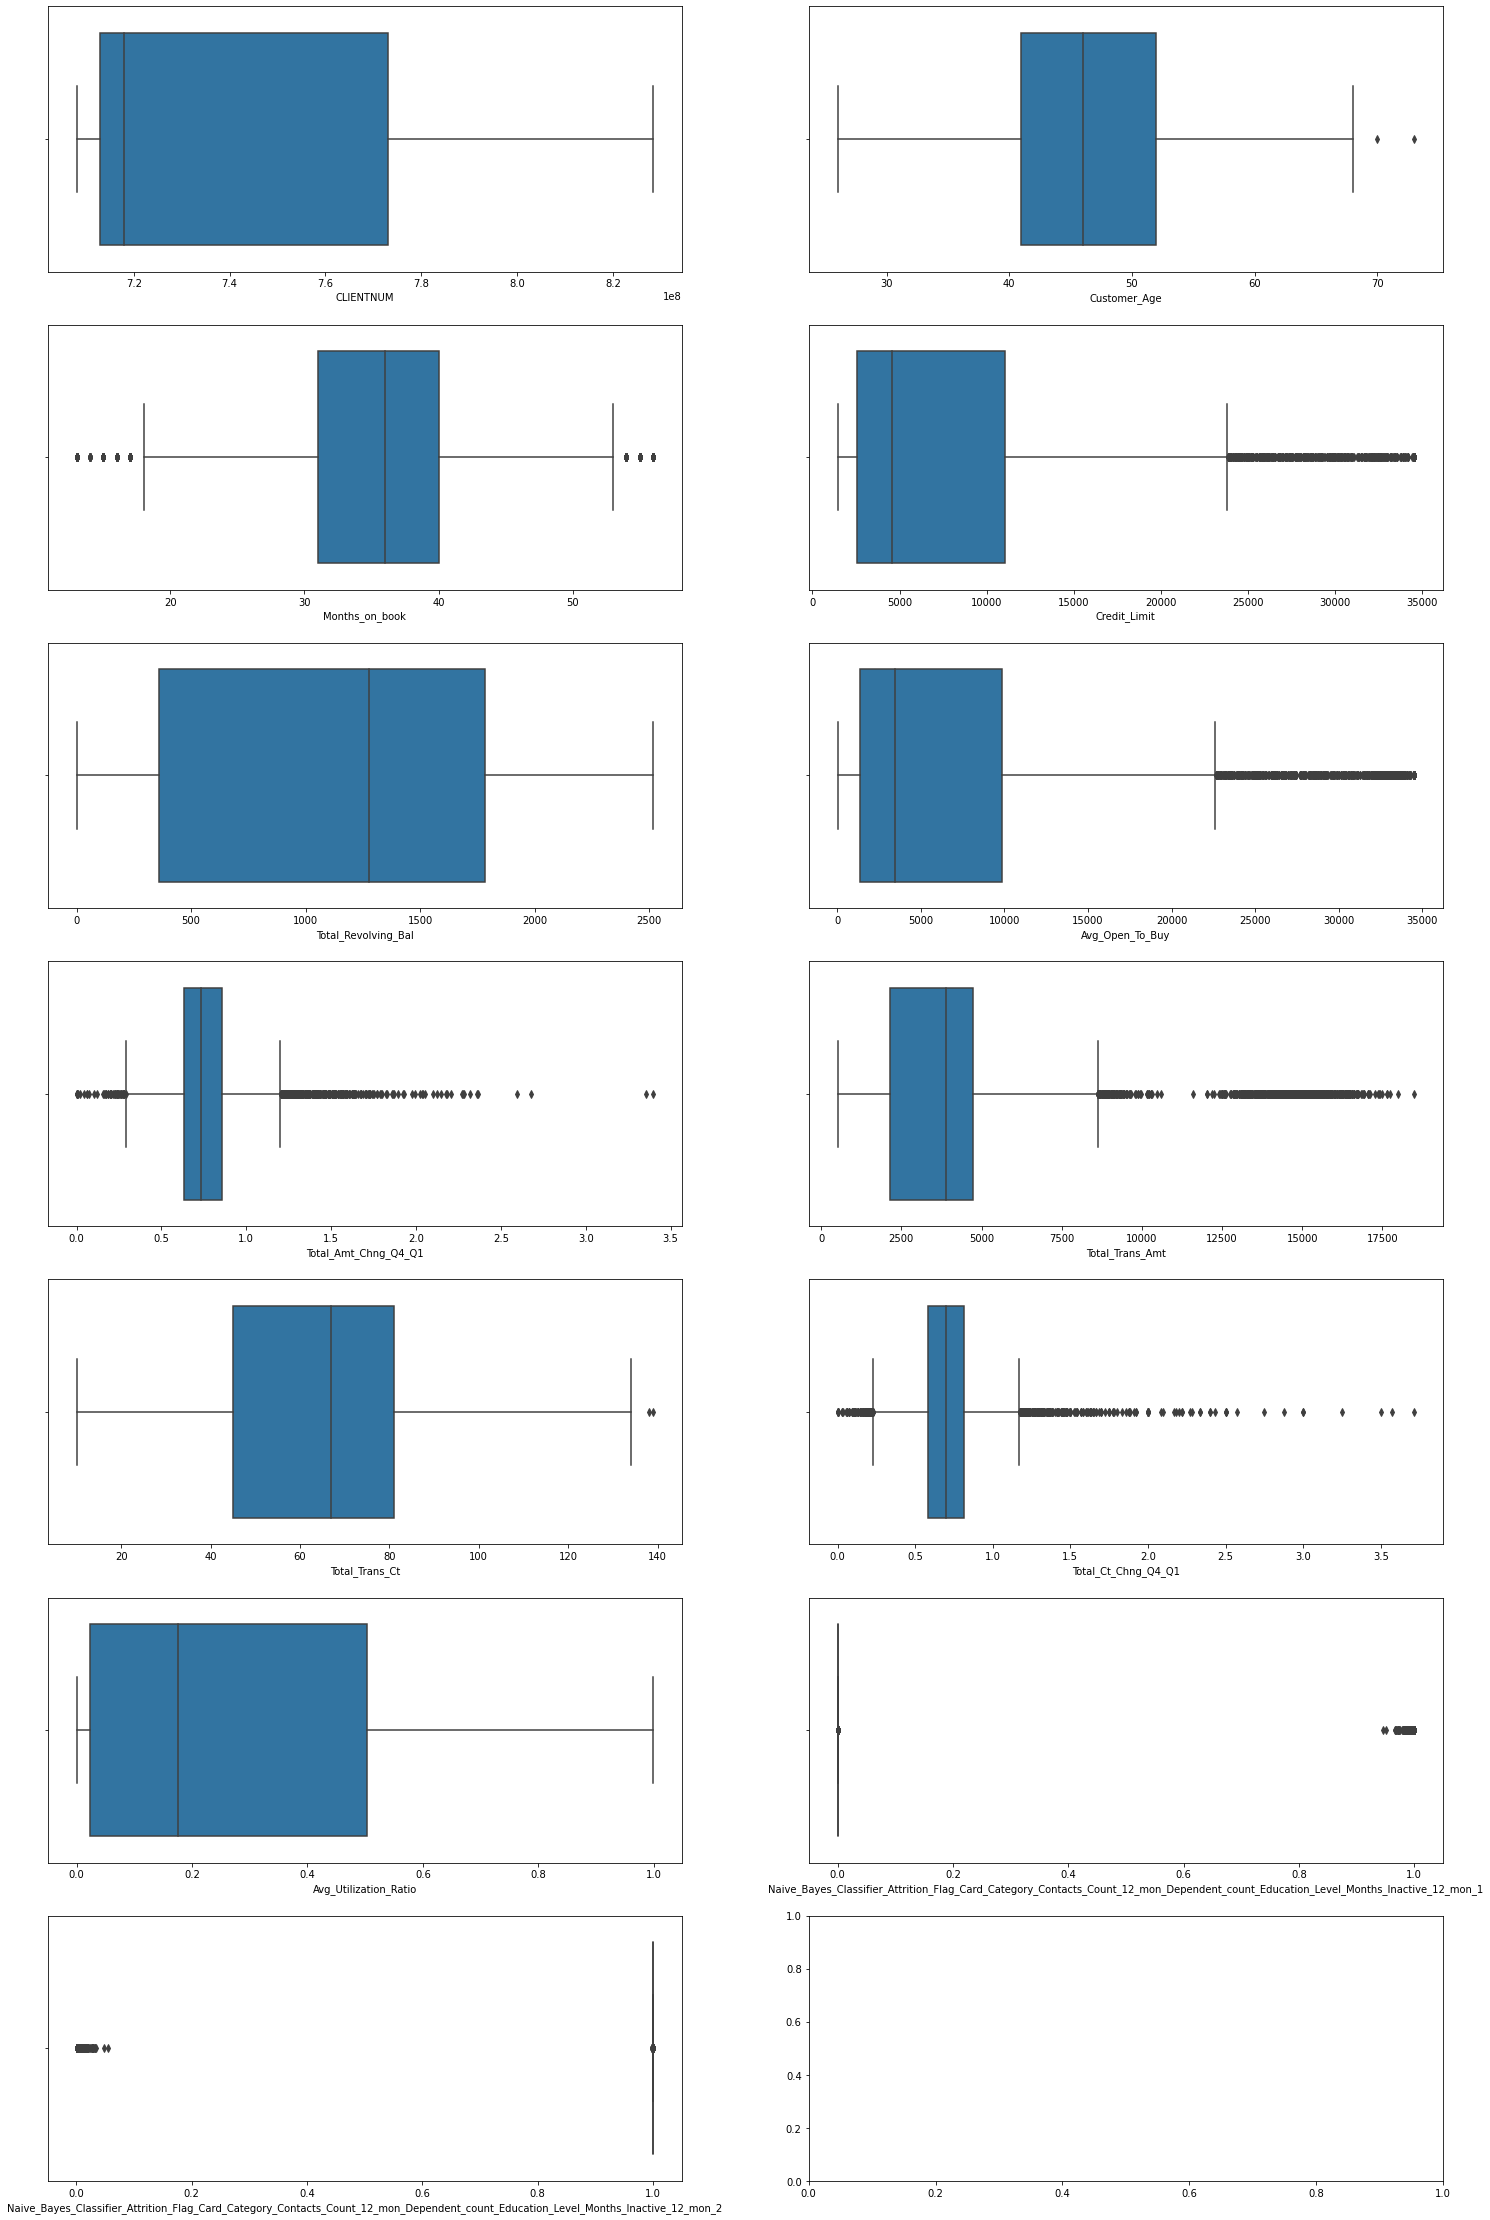

In [7]:
fig, axs = plt.subplots(7, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

plt.show()

# Scatter before deleting

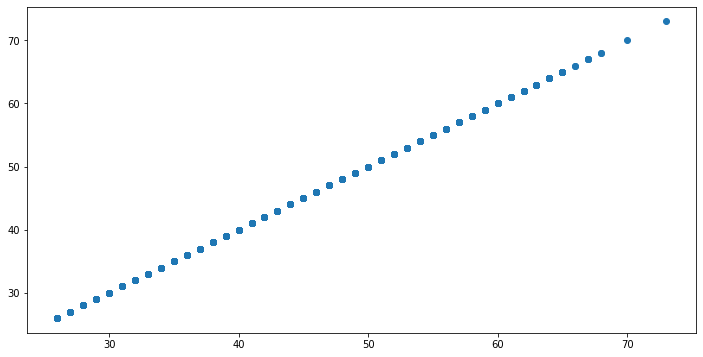

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(bank['Customer_Age'], bank['Customer_Age'])

# Deleting outliers 

In [9]:
print(bank.shape)
for i in numeric_names:
    z=np.abs(stats.zscore(bank[i]))
    bank=bank[(z< 3)]
print(bank.shape)

(10127, 23)
(9485, 23)


# Scatter after removing

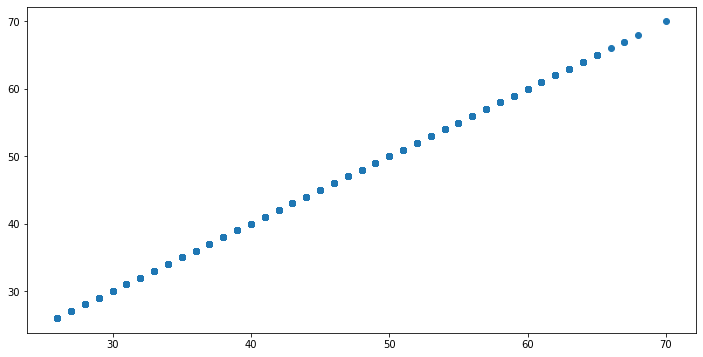

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(bank['Customer_Age'], bank['Customer_Age'])

# Graphs after deleting

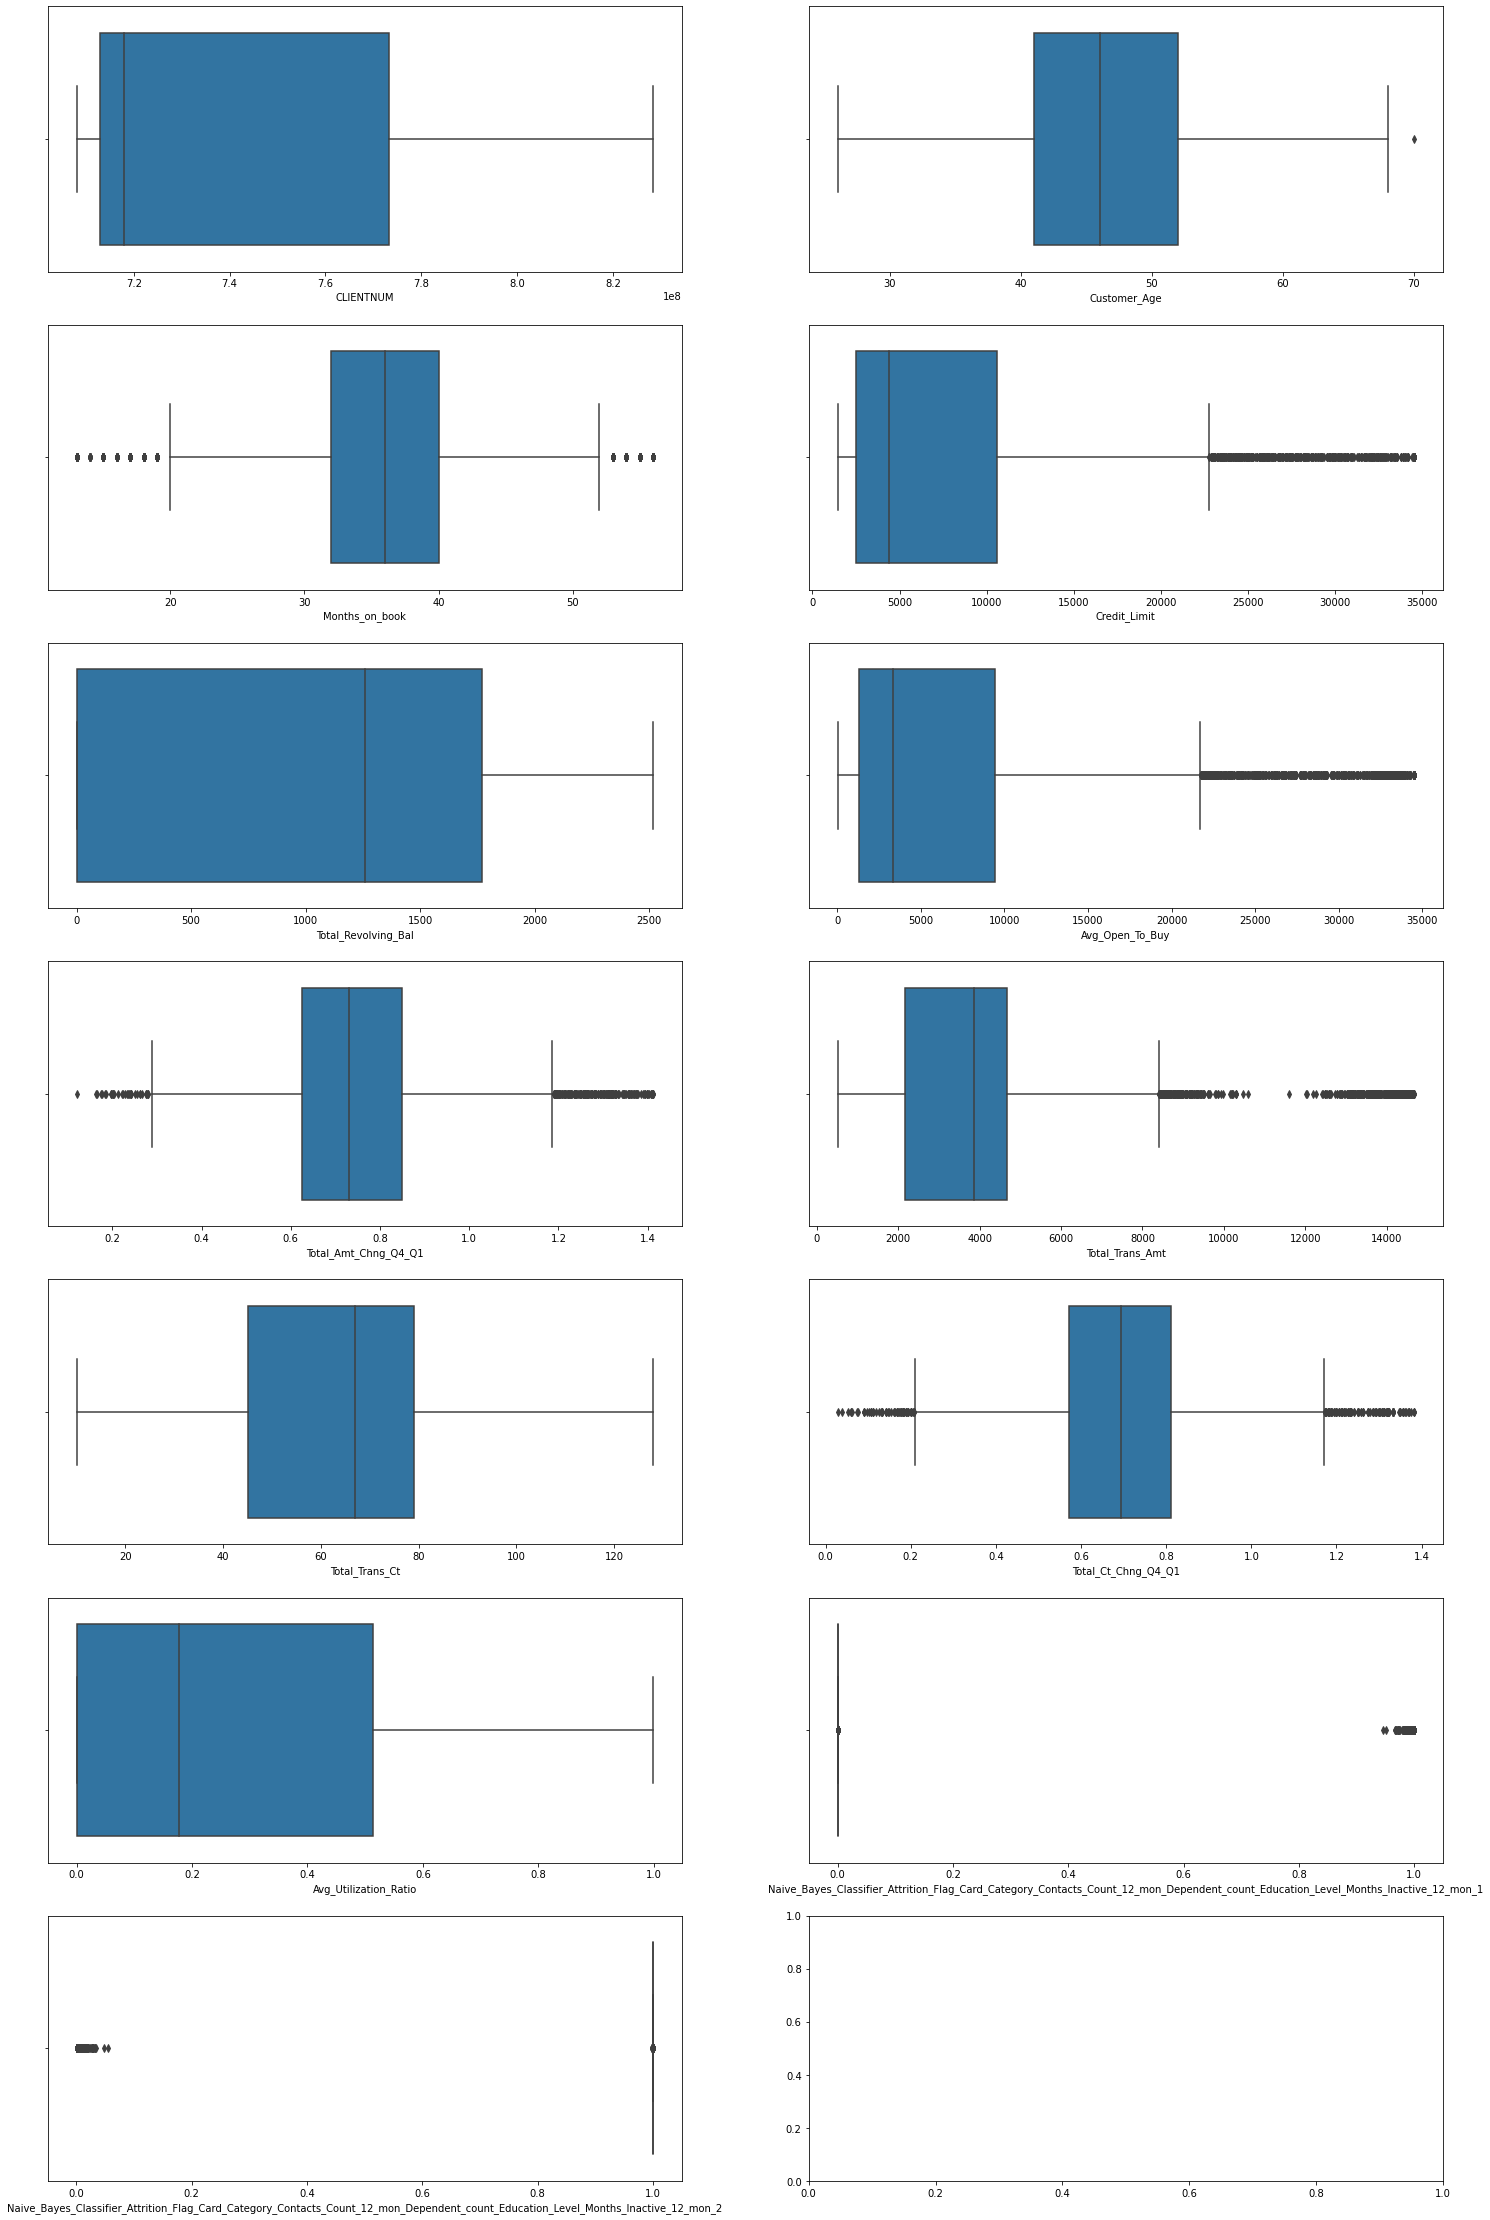

In [11]:
fig, axs = plt.subplots(7, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

plt.show()

# Normalization data

In [12]:
bank[numeric_names[1:]] = bank[numeric_names[1:]].apply(lambda x: (x-x.min())/(x.max()-x.min())) 
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
5,713061558,1,0.409091,1,2,2,1,1,0,0.534884,...,0.077747,0.495431,0.079970,0.972136,0.040813,0.118644,0.604136,0.311311,0.000047,0.999950
10,708790833,1,0.363636,1,5,5,1,0,0,0.418605,...,0.160522,0.582837,0.152928,0.550310,0.048793,0.271186,0.481536,0.217217,0.000183,0.999820
14,712396908,1,0.704545,0,2,2,1,4,0,0.813953,...,0.030162,0.270163,0.050792,0.828173,0.074848,0.161017,0.430576,0.279279,0.000106,0.999900
19,709327383,1,0.431818,0,2,2,1,3,0,0.558140,...,0.393972,0.459674,0.385652,0.654799,0.049216,0.093220,0.650665,0.080080,0.000047,0.999950
20,806165208,1,0.477273,1,1,1,0,2,0,0.674419,...,0.590751,0.715137,0.555617,0.608359,0.047168,0.144068,0.665436,0.086086,0.000049,0.999950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,1,0.681818,0,1,2,2,4,0,0.860465,...,0.068013,0.240763,0.089213,0.348297,0.994634,0.932203,0.563516,0.164164,0.000141,0.999860
10123,710638233,0,0.340909,1,2,3,0,1,0,0.279070,...,0.085819,0.868494,0.060499,0.529412,0.582827,0.500000,0.483752,0.511512,0.995688,0.004311
10124,716506083,0,0.409091,0,1,3,1,4,0,0.534884,...,0.120042,0.000000,0.156637,0.541022,0.690651,0.423729,0.583456,0.000000,0.998299,0.001699
10125,717406983,0,0.090909,1,2,2,2,1,0,0.534884,...,0.116172,0.000000,0.152928,0.321207,0.556772,0.440678,0.512555,0.000000,0.997129,0.002875


In [13]:
bank.iloc[:,1:].to_csv("BankChurnML.csv", index=False)